# 线性规划

## 生产问题

木匠制作桌子和书架出售，单位净利润分别为 25 美元和 30 美元。他每周最多有 690 张木板可以用，每周最多工作 120 小时。生成一张桌子需要 20 张木板和 5 小时的劳动时间，生产一个书架需要 30 张木板和 4 小时的劳动时间。此外，他已经签订了每周供应 4 张桌子和 2 个书架的交货合同。每周需制作多少桌子和书架才能使获得的利润最大？

$$
\begin{array}{lcl}
    & \mbox{Max}\ 25x_1 + 30x_2 & \\
    \mbox{s.t.} & &  \\
    &
        \begin{array}{c}
          20x_1 + 30x_2 \le 690 (\text{木板})\\
          5x_1 + 4x_2 \le 120 (\text{劳动时间})\\
          x_1 \ge 4 (\text{合同})\\
          x_2 \ge 2 (\text{合同})
        \end{array}
    &
\end{array}
$$

线性规划可以通过[scipy.optimize.linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)来求解。需要注意的是，scipy的linprog求解的是极小化问题，如果要求解极大化，需要对目标函数进行一定的变换。

~~~ python
scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=(0, None), method='highs', callback=None, options=None, x0=None, integrality=None)[source]
~~~

x = [31.5  2. ], profit = 847.5


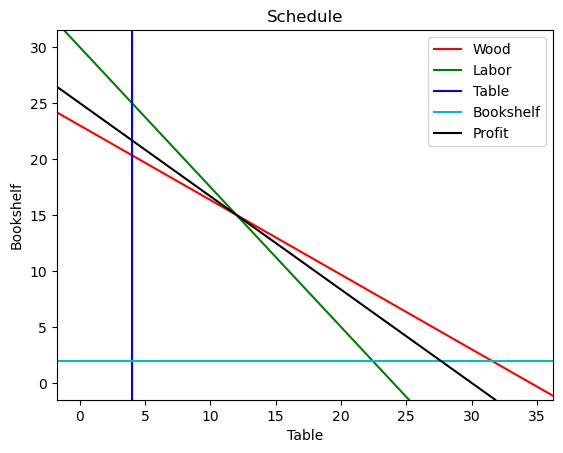

In [9]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

c = [-25, -30]
A = [[20, 30], [5,4]]
b = [690, 120]
x1_bounds = (4, None)
x2_bounds = (2, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds])

print(f"x = {res.x}, profit = {-res.fun}")

# 画图

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axline((0, 23), (34.5,0), color='r', label='Wood')
ax.axline((0, 30), (24, 0), color='g', label='Labor')
ax.axline((4, 0), (4, 10), color='b', label='Table')
ax.axline((0, 2), (10, 2), color='c', label='Bookshelf')
ax.axline((12,15), slope=-25/30, color='k', label='Profit')


ax.set(title='Schedule', xlabel='Table', ylabel='Bookshelf')
ax.legend()

plt.show()


**思考题**: 增加劳动时间能否增加利润？这种增加是一直增加，还是有一定的限度？

## 练习题

### 服装公司

某服装公司为淘宝店生产男士衬衫和女士衬衫，淘宝店将接受所有该公司生产的衬衫。生产过程包括裁剪、缝纫和包装3个过程，公司雇佣了25名工人在裁剪车间，35名工人在缝纫车间，以及5名工人在包装车间。工厂每天工作8个小时，一周工作5天。下表给出了生产两种衬衫的时间需求及价格：

| 服装    | 裁剪(分钟) | 缝纫(分钟) | 包装(分钟) | 价格/件(元)|
|---------|------------|------------|-------------|------------|
|男士衬衫 |20          |70          |12          |80          |
|女士衬衫 |60          |60          |4           |120         |

* 为该服装公司制定生产计划。
* 如果允许裁剪工加班，公司最多付给加班员工每小时多少钱？

答：

设每周生产男士衬衫$x_1$件，女士衬衫$x_2$件，则：

$$
\begin{array}{lcl}
    & \mbox{Max}\ 80x_1 + 120x_2 & \\
    \mbox{s.t.} & &  \\
    &
        \begin{array}{c}
          20x_1 + 60x_2 \le 25 * 5 * 8 * 60 (\text{裁剪})\\
          70x_1 + 60x_2 \le 35 * 5 * 8 * 60 (\text{缝纫})\\
          12x_1 + 4x_2 \le 5 * 5 * 8 * 60 (\text{包装})\\
          x_1 \ge 0, x_2 \ge 0
        \end{array}
    &
\end{array}
$$

In [2]:
import numpy as np
from scipy.optimize import linprog

c = [-80, -120]
A = [[20, 60], [70,60], [12, 4]]
b = [25*5*8*60, 35*5*8*60, 5*5*8*60]
x1_bounds = (0, None)
x2_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds])

print(f"x = {res.x}, profit = {-res.fun}")


x = [480. 840.], profit = 139200.0


### 云计算公司

某云计算公司出售A、B两种套餐给客户。其中A套餐每天平均使用Web服务器2小时、数据库4小时、无需GPU；而B套餐是计算型套餐，每天平均使用Web服务器2小时、GPU运算5小时，无需数据库。该云计算公司所有机器每天能提供Web服务1200小时、数据库1600小时、GPU运算1500小时。A套餐每天的价格是20元，B套餐的价格是每天30元，由于客户很多，每种套餐都是供不应求，请为该云计算公司制定一套出售方案，使得公司的获利最大。

答：设A、B套餐分别为$x_1$, $x_2$，则：


$$
\begin{array}{lcl}
    & \mbox{Max}\ 20x_1 + 30x_2 & \\
    \mbox{s.t.} & &  \\
    &
        \begin{array}{c}
          2x_1 + 2x_2 \le 1200 (\text{Web})\\
          4x_1 \le 1600 (\text{数据库})\\
          5x_2 \le 1500 (\text{GPU})\\
          x_1 \ge 0, x_2 \ge 0
        \end{array}
    &
\end{array}
$$

In [3]:
import numpy as np
from scipy.optimize import linprog


c = [-20, -30]
A = [[2, 2], [4, 0], [0, 5]]
b = [1200, 1600, 1500]
x1_bounds = (0, None)
x2_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds])

print(f"x = {res.x}, profit = {-res.fun}")



x = [300. 300.], profit = 15000.0
